In [10]:
setwd("GWA/projects/validation/mlstComparison/distancesComparison/lmo")

ERROR: Error in setwd("GWA/projects/validation/mlstComparison/distancesComparison/lmo"): cannot change working directory


In [30]:
chewbbaca <- read.csv("distances.chewbbaca.lmo.tsv.gz", sep="\t")
bn <- read.csv("distances.BN.lmo.tsv.gz", sep="\t")
etoki <- read.csv("distances.etoki.lmo.tsv.gz", sep="\t")

# add a key for merging later
bn$key <- paste(bn$sample1, bn$sample2, sep="")
etoki$key <- gsub(".fasta", "", gsub("_1.shovillSpades", "", paste(basename(etoki$fasta1), basename(etoki$fasta2), sep="")))
chewbbaca$key <- gsub("_1.shovillSpades.fasta","",paste(chewbbaca$sample1,chewbbaca$sample2, sep=""))

# make each spreadsheet have distinct columns
colnames(chewbbaca) <- c("sample1.chewbbaca","sample2.chewbbaca","identity.chewbbaca", "numSame.chewbbaca", "numCompared.chewbbaca","key")
colnames(bn) <- c("SRR1", "SRR2", "identity.bn", "numSame.bn", "numCompared.bn", "key")
colnames(etoki) <- c("sample1.etoki", "sample2.etoki", "identity.etoki", "numSame.etoki", "numCompared.etoki", "key")

In [31]:
head(chewbbaca)
head(bn)
head(etoki)

,sample1.chewbbaca,sample2.chewbbaca,identity.chewbbaca,numSame.chewbbaca,numCompared.chewbbaca,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR1001045_1.shovillSpades.fasta,SRR1001051_1.shovillSpades.fasta,0.281536697,491,1744,SRR1001045SRR1001051
2,SRR1001045_1.shovillSpades.fasta,SRR10013017_1.shovillSpades.fasta,0.297591743,519,1744,SRR1001045SRR10013017
3,SRR1001045_1.shovillSpades.fasta,SRR10013398_1.shovillSpades.fasta,0.006988934,12,1717,SRR1001045SRR10013398
4,SRR1001045_1.shovillSpades.fasta,SRR1005531_1.shovillSpades.fasta,0.281948424,492,1745,SRR1001045SRR1005531
5,SRR1001045_1.shovillSpades.fasta,SRR10134430_1.shovillSpades.fasta,0.006900518,12,1739,SRR1001045SRR10134430
6,SRR1001045_1.shovillSpades.fasta,SRR10147713_1.shovillSpades.fasta,0.298165138,520,1744,SRR1001045SRR10147713


,SRR1,SRR2,identity.bn,numSame.bn,numCompared.bn,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR1001045,SRR1001051,0.283972125,489,1722,SRR1001045SRR1001051
2,SRR1001045,SRR10013017,0.301633606,517,1714,SRR1001045SRR10013017
3,SRR1001045,SRR10013398,0.006988934,12,1717,SRR1001045SRR10013398
4,SRR1001045,SRR1005531,0.285465116,491,1720,SRR1001045SRR1005531
5,SRR1001045,SRR10134430,0.006993007,12,1716,SRR1001045SRR10134430
6,SRR1001045,SRR10147713,0.303350970,516,1701,SRR1001045SRR10147713


,sample1.etoki,sample2.etoki,identity.etoki,numSame.etoki,numCompared.etoki,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR1001051_1.shovillSpades.fasta,0.28,487,1725,SRR1001045SRR1001051
2,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10013017_1.shovillSpades.fasta,0.30,517,1724,SRR1001045SRR10013017
3,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10013398_1.shovillSpades.fasta,0.01,12,1703,SRR1001045SRR10013398
4,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR1005531_1.shovillSpades.fasta,0.28,488,1725,SRR1001045SRR1005531
5,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10134430_1.shovillSpades.fasta,0.01,12,1726,SRR1001045SRR10134430
6,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10147713_1.shovillSpades.fasta,0.30,518,1724,SRR1001045SRR10147713


In [32]:
merged <- merge(merge(etoki, chewbbaca, by.x="key", by.y="key"), bn, by.x="key", by.y="key")
head(merged)

,key,sample1.etoki,sample2.etoki,identity.etoki,numSame.etoki,numCompared.etoki,sample1.chewbbaca,sample2.chewbbaca,identity.chewbbaca,numSame.chewbbaca,numCompared.chewbbaca,SRR1,SRR2,identity.bn,numSame.bn,numCompared.bn
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
1,SRR1001045SRR1001051,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR1001051_1.shovillSpades.fasta,0.28,487,1725,SRR1001045_1.shovillSpades.fasta,SRR1001051_1.shovillSpades.fasta,0.281536697,491,1744,SRR1001045,SRR1001051,0.283972125,489,1722
2,SRR1001045SRR10013017,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10013017_1.shovillSpades.fasta,0.30,517,1724,SRR1001045_1.shovillSpades.fasta,SRR10013017_1.shovillSpades.fasta,0.297591743,519,1744,SRR1001045,SRR10013017,0.301633606,517,1714
3,SRR1001045SRR10013398,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10013398_1.shovillSpades.fasta,0.01,12,1703,SRR1001045_1.shovillSpades.fasta,SRR10013398_1.shovillSpades.fasta,0.006988934,12,1717,SRR1001045,SRR10013398,0.006988934,12,1717
4,SRR1001045SRR1005531,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR1005531_1.shovillSpades.fasta,0.28,488,1725,SRR1001045_1.shovillSpades.fasta,SRR1005531_1.shovillSpades.fasta,0.281948424,492,1745,SRR1001045,SRR1005531,0.285465116,491,1720
5,SRR1001045SRR10134430,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10134430_1.shovillSpades.fasta,0.01,12,1726,SRR1001045_1.shovillSpades.fasta,SRR10134430_1.shovillSpades.fasta,0.006900518,12,1739,SRR1001045,SRR10134430,0.006993007,12,1716
6,SRR1001045SRR10147713,etoki.lmo/SRR1001045_1.shovillSpades.fasta,etoki.lmo/SRR10147713_1.shovillSpades.fasta,0.30,518,1724,SRR1001045_1.shovillSpades.fasta,SRR10147713_1.shovillSpades.fasta,0.298165138,520,1744,SRR1001045,SRR10147713,0.303350970,516,1701


In [56]:
minLoci <- 0.85 * 1748
filtered <- subset(merged, SRR1!="SRR8594947" & SRR2!="SRR8594947" & SRR1!="SRR2049107" & SRR2!="SRR2049107" & numCompared.etoki > minLoci & numCompared.bn > minLoci & numCompared.chewbbaca > minLoci)

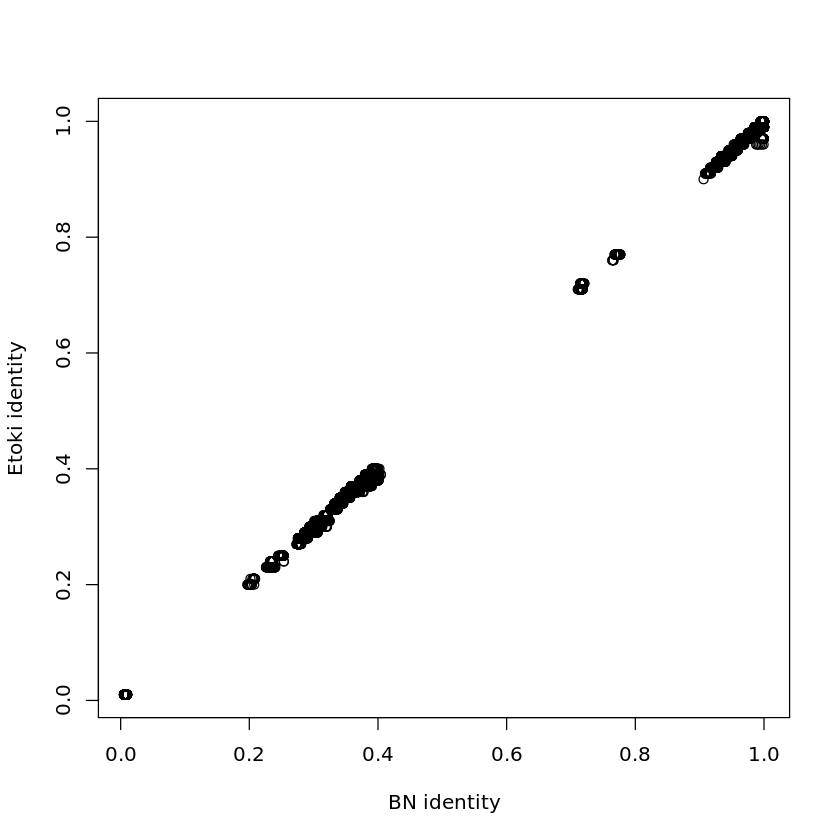

In [57]:
plot(filtered$identity.bn, filtered$identity.etoki, xlab="BN identity", ylab="Etoki identity", col="black")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



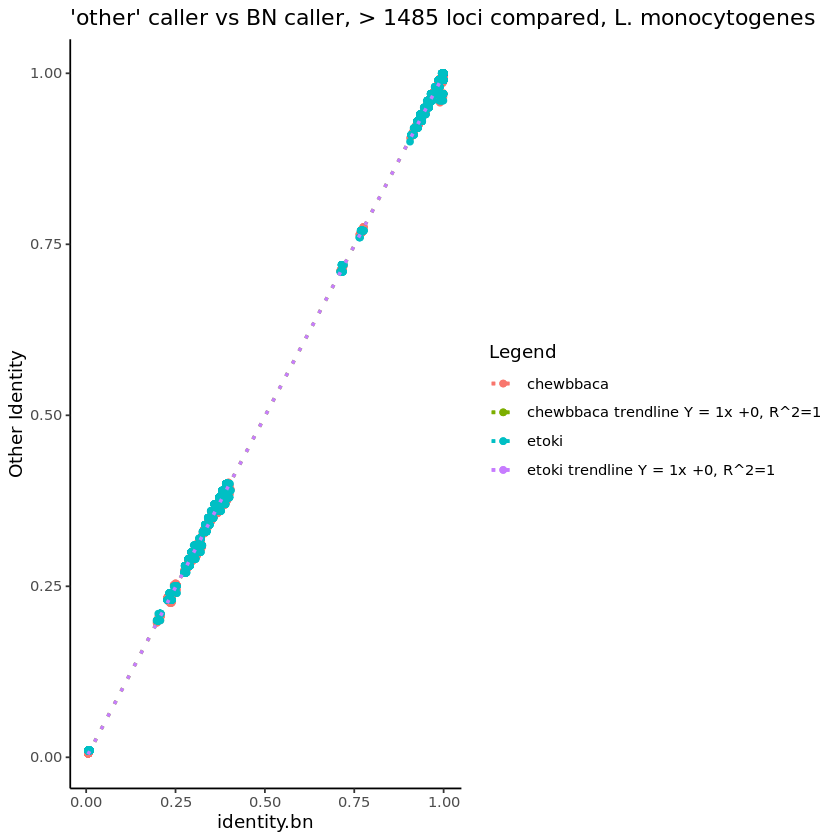

In [58]:
library("ggplot2")
lm_etoki  <- lm(filtered$identity.etoki ~ filtered$identity.bn)
rs_etoki  <- summary(lm_etoki)$r.squared
cc_etoki  <- lm_etoki$coefficients
eqn_etoki <- paste("Y = ", round(cc_etoki[-1],2), "x +", round(cc_etoki[1],2), ", R^2=",round(rs_etoki,2), sep="")

lm_chewbbaca  <- lm(filtered$identity.chewbbaca ~ filtered$identity.bn)
rs_chewbbaca  <- summary(lm_chewbbaca)$r.squared
cc_chewbbaca  <- lm_chewbbaca$coefficients
eqn_chewbbaca <- paste("Y = ", round(cc_chewbbaca[-1],2), "x +", round(cc_chewbbaca[1],2),", R^2=",round(rs_chewbbaca,2), sep="")

ggplot(filtered,n=10000, aes(x=identity.bn)) +
  theme_classic() + 
  ggtitle(
    paste("'other' caller vs BN caller, > ",floor(minLoci)," loci compared, L. monocytogenes", sep="")
  ) +
  geom_point(aes(y=identity.chewbbaca, color="chewbbaca")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.chewbbaca, color=paste("chewbbaca trendline",eqn_chewbbaca)), method="lm", se=FALSE, linetype="dotted") +
  geom_point(aes(y=identity.etoki, color="etoki")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.chewbbaca, color=paste("etoki trendline",eqn_etoki)), method="lm", se=FALSE, linetype="dotted") +
  labs(y = "Other Identity", color = "Legend") 
